In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
# which is a derivative work from original NIST datasets.
# MNIST dataset is made available under the terms of the
# Creative Commons Attribution-Share Alike 3.0 license.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Multi-Class Classification

This Colab explores multi-class classification problems through the classic MNIST dataset.

## Learning Objectives:

After doing this Colab, you'll know how to do the following:

  * Understand the classic MNIST problem.
  * Create a deep neural network that performs multi-class classification.
  * Tune the deep neural network.

This exercise introduces image classification with machine learning.

## The Dataset
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized).

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
# 輸出將被格式化以適應指定的每行字符數
np.set_printoptions(linewidth = 200)

## Load the dataset

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`:

In [4]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


Notice that `mnist.load_data()` returned four separate values:

* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

**Note:** The MNIST .csv training set is already shuffled.

## View the dataset

The .csv file for the California Housing Dataset contains column names (for example, `latitude`, `longitude`, `population`). By contrast, the .csv file for MNIST does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. In fact, it is probably best to think of `x_train` and `x_test` as two-dimensional NumPy arrays:  



In [5]:
# Output example #2917 of the training set.
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

Alternatively, you can call `matplotlib.pyplot.imshow` to interpret the preceding numeric array as an image.

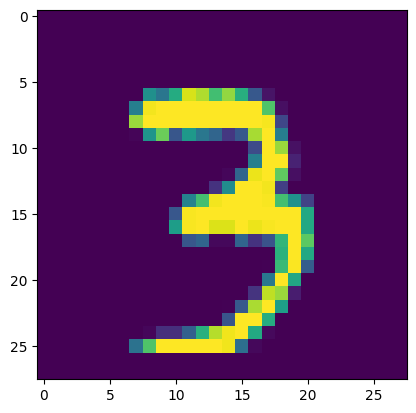

In [6]:
# Use false colors to visualize the array.
plt.imshow(x_train[2917])

In [7]:
# Output row #10 of example #2917.
x_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [10]:
# Output pixel #16 of row #10 of example #2900.
x_train[2917][10][16]

58

## Task 1: Normalize feature values

Complete the following code cell to map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. Store the floating-point values in `x_train_normalized` and `x_test_normalized`.

In [11]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


## Define a plotting function

The following function plots an accuracy curve:

## Define the plotting function

In [12]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a deep neural net model

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net，深度神經網絡中的層數.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer，每層中的節點數量.
* Any [regularization](https://developers.google.com/machine-learning/glossary/#regularization) layers，任何正則化層.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.  The activation function of the output layer is [softmax](https://developers.google.com/machine-learning/glossary/#softmax), which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.  
create_model 函數還定義了每一層的激活函數。輸出層的激活函數是 softmax，它會為每個樣本產生 10 個不同的輸出。這 10 個輸出中的每一個都提供了輸入樣本是某個數字的概率。

**Note:** Unlike several of the recent Colabs, this exercise does not define feature columns or a feature layer.  Instead, the model will train on the NumPy array.

In [14]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""

  # All models in this course are sequential.
  # Sequential 模型是一種線性堆疊的模型，表示一層接一層地構建神經網絡。
  model = tf.keras.models.Sequential()

  # Flatten 層：將二維的 28x28 陣列轉換為一維的 784 元素陣列，以便輸入到密集層。
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # 第一個隱藏層：有 128 個節點的全連接層，使用 ReLU 激活函數。
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))

  # Dropout 層：=添加一個 Dropout 層，以 0.2 的比率丟棄部分輸出，這是一種正則化技術，有助於防止過擬合。
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # 輸出層：添加一個包含 10 個單元並使用 softmax 激活函數的密集層。這層用於輸出每個類別的概率。
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  # Construct the layers into a model that TensorFlow can execute.
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.
  # 使用 Adam 優化器和適用於多類別分類的損失函數（sparse_categorical_crossentropy）來編譯模型。
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

  return model


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  # 訓練模型：使用提供的特徵和標籤數據進行訓練。可以設置批次大小和驗證集比例。模型將在每個 epoch 後打亂數據。
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)

  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch.
  # 獲取訓練過程中的歷史數據：保存每個 epoch 的訓練歷史，以便後續分析。
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  print("epochs: ", epochs)
  print("hist: ", hist)

  return epochs, hist

## Invoke the previous functions

Run the following code cell to invoke the preceding functions and actually train the model on the training set.

**Note:** Due to several factors (for example, more examples and a more complex neural network) training MNIST might take longer than training the California Housing Dataset.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3839 - loss: 1.8983 - val_accuracy: 0.7864 - val_loss: 0.8734
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7214 - loss: 0.9118 - val_accuracy: 0.8693 - val_loss: 0.5165
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8072 - loss: 0.6345 - val_accuracy: 0.8936 - val_loss: 0.4010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8521 - loss: 0.5047 - val_accuracy: 0.9063 - val_loss: 0.3414
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8670 - loss: 0.4483 - val_accuracy: 0.9153 - val_loss: 0.3087
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8826 - loss: 0.4051 - val_accuracy: 0.9202 - val_loss: 0.2870
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8891 - loss: 0.3801 - val_accuracy: 0.9242 - val_loss: 0.2707
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8957 - loss: 0.3582 - val_accuracy: 0.9274 - v

[0.14586037397384644, 0.958899974822998]

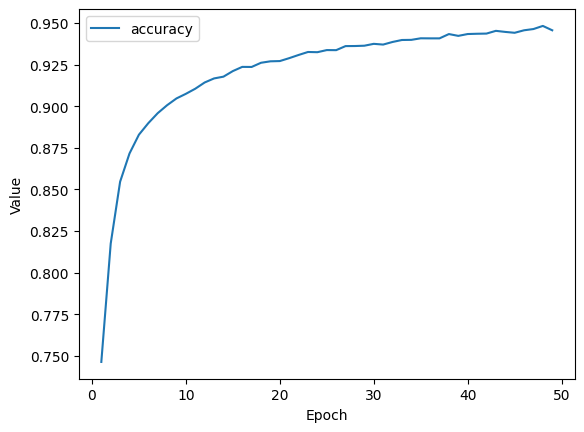

In [15]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train,
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

## Task 2: Optimize the model

Experiment with the following:

* number of hidden layers
* number of nodes in each layer
* dropout regularization rate：Dropout 正則化率

What trends did you discover?  Can you reach at least 98% accuracy against the test set?  

在現實中，全面試驗網絡結構和 Dropout 正則化率會花費很長時間。在實際應用中，你還會試驗學習率、批次大小和訓練次數。由於你只有幾分鐘時間，搜索趨勢可能會有所幫助。發現了以下趨勢：  

* 增加第一個隱藏層的節點數量（至少增加到 256 個節點）提高了準確率。
* 增加第二個隱藏層通常會提高準確率。
* 當模型包含大量節點時，如果 Dropout 率不至少為 0.5，模型會過擬合。

通過以下配置達到了 98% 的測試準確率：  
* 一個包含 256 個節點的隱藏層；沒有第二個隱藏層。
* Dropout 正則化率為 0.4

通過以下配置達到了 98.2% 的測試準確率：
* 第一個隱藏層有 256 個節點；
* 第二個隱藏層有 128 個節點。
* Dropout 正則化率為 0.2
